In [1]:
from sklearn.datasets import fetch_openml  
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_openml('mnist_784', version=1) # 사이킷런에서 mnist 데이터 불러오기 (dictionary)
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X,y = mnist["data"], mnist["target"] # 70000개의 데이터 : X[i] = 28x28 손글씨 이미지, y[i] = 레이블
y = y.astype(np.uint8) # 문자열 형태 y를 정수로 변환
print("X : {0}".format(X.shape))
print("y : {0}".format(y.shape))

X : (70000, 784)
y : (70000,)


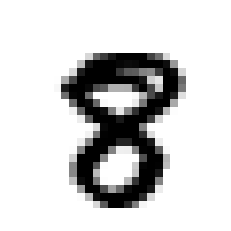

In [33]:
some_digit = X[23456]
some_label = y[23456]
some_digit_image = some_digit.reshape(28,28) # X[12345]를 28x28 행렬로 재배열

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show() # 이미지 출력

In [16]:
print("The answer is : {0}".format(some_label))

The answer is : 3


In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # train : test = 6 : 1
y_train_8, y_test_8 = (y_train==8), (y_test==8) # 이진 분류기를 먼저 만들어보자 [8 or ~8]

In [35]:
sgd_clf = SGDClassifier(random_state=32) # Stochastic Gradient Descent Classifier을 모델로 사용
sgd_clf.fit(X_train, y_train_8) # 훈련(학습) 개시 (fit)

SGDClassifier(random_state=32)

In [37]:
sgd_clf.predict([some_digit]) # 모델에 입력을 넣으면 결과가 출력된다. (predict)

array([ True])

In [42]:
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy") # 3겹 교차검증 후 정확도 각각 체크

array([0.9384, 0.9316, 0.9148])

In [41]:
class Never8(BaseEstimator): # 무조건 8이 아니라고 하는 모델을 사용 
    def fit(self, X, y=None): # fit = 훈련 (학습안함)
        return self
    def predict(self, X): # predict = 직접 예측 (무조건 false)
        return np.zeros((len(X),1),dtype=bool)

In [44]:
never_8_clf = Never8()
cross_val_score(never_8_clf, X_train, y_train_8, cv=3, scoring="accuracy") # 3겹 교차검증 재실시

array([0.9039 , 0.9031 , 0.90045])